In [ ]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import ipywidgets as widgets
warnings.filterwarnings('ignore')

# =====================
#  Citire dataset
# =====================
cadru_de_date = pd.read_csv("C:/Users/razva/Downloads/creditcard_2023.csv")
cleaned_df = cadru_de_date.copy()

# =====================
#  Stil
# =====================
global_styles = """
<style>
    body { background: #121212; color: #f2f2f2; font-family: 'Helvetica Neue', Arial, sans-serif; }
    .kw-heading {
        font-size: 2.5em; font-weight: bold; text-align: center;
        margin: 40px 0 20px; letter-spacing: 4px;
        color: #f2f2f2; text-transform: uppercase;
        border-bottom: 4px solid #ffcc00; width: fit-content;
        margin-left: auto; margin-right: auto;
    }
    .kw-table {
        width: 90%; margin: 20px auto;
        border-collapse: collapse; box-shadow: 0 4px 20px rgba(0,0,0,0.5);
    }
    .kw-table th, .kw-table td {
        padding: 14px 20px; text-align: center;
        border-bottom: 2px solid #333;
        max-width: 250px; overflow: hidden; text-overflow: ellipsis;
    }
    .kw-table th {
        background: #000; color: #ffcc00; font-size: 1.1em; cursor: pointer;
    }
    .kw-table tr:hover td {
        background: #1a1a1a; color: #fff;
    }
</style>
"""

def styled_heading(text):
    return f"<div class='kw-heading'>{text}</div>"

def style_table(df, tbl_id):
    return df.to_html(classes='kw-table', table_id=tbl_id)

# =====================
#  Functii Analiza
# =====================
def print_dataset_analysis(df):
    display(HTML(global_styles + styled_heading("Dataset Overview")))
    display(HTML(style_table(df.head(5), "tbl1")))
    display(HTML(styled_heading("Statistical Summary")))
    display(HTML(style_table(df.describe(), "tbl2")))
    display(HTML(styled_heading("Missing Values")))
    nulls = df.isnull().sum()
    display(nulls[nulls>0] if nulls.sum()>0 else HTML("<p>✅ No missing values</p>"))
    display(HTML(styled_heading("Duplicates")))
    display(HTML(f"<p style='text-align:center; font-size:1.2em;'>{df.duplicated().sum()} duplicate rows</p>"))
    display(HTML(styled_heading("Shape")))
    display(HTML(f"<p style='text-align:center; font-size:1.2em;'>Rows: {df.shape[0]}, Columns: {df.shape[1]}</p>"))

def print_unique_values(df):
    display(HTML(styled_heading("Unique Values (first 7)")))
    uv = pd.DataFrame({
        "Column": df.columns,
        "Type": [df[c].dtype for c in df.columns],
        "Unique (primele 7)": [', '.join(map(str, df[c].unique()[:7])) for c in df.columns]
    })
    display(HTML(style_table(uv, "tbl4")))

def detect_outliers(df):
    display(HTML(styled_heading("Outlier Detection")))
    numeric = df.select_dtypes(include=[np.number])
    outliers = {}
    for col in numeric.columns:
        q1 = numeric[col].quantile(0.25)
        q3 = numeric[col].quantile(0.75)
        iqr = q3-q1
        mask = (numeric[col] < q1 - 1.5*iqr) | (numeric[col] > q3 + 1.5*iqr)
        outliers[col] = mask.sum()
    display(HTML(style_table(pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier Count']), 'tbl5')))

def top_frequent_values(df):
    display(HTML(styled_heading("Top 3 Frequent Values per Column")))
    data = []
    for col in df.columns:
        freq = df[col].value_counts().head(3).to_dict()
        data.append({"Column": col, "Top Values": str(freq)})
    freq_df = pd.DataFrame(data)
    display(HTML(style_table(freq_df, "tbl6")))

def memory_usage_summary(df):
    mem_df = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Memory (KB)": (df.memory_usage(deep=True, index=False)/1024).round(2).values
    })
    display(HTML(styled_heading("Memory Usage per Column")))
    display(HTML(style_table(mem_df, "tbl7")))

def plot_missing_values_heatmap(df):
    sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
    plt.title("Missing Values Heatmap")
    plt.show()

def plot_correlation_matrix(df):
    numeric = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric.corr(), annot=True, cmap="Wistia")
    plt.title("Correlation Matrix")
    plt.show()

def plot_distributions(df):
    numeric = df.select_dtypes(include=[np.number])
    for col in numeric.columns[:5]:
        plt.figure(figsize=(6,4))
        plt.hist(numeric[col], bins=30, color='gold')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_categorical_pie(df):
    cats = df.select_dtypes(exclude=[np.number])
    for col in cats.columns[:3]:
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ffcc00','#1a1a1a','#999'])
        plt.title(f"Distribution of {col}")
        plt.ylabel('')
        plt.show()

# 🚀 Extra Functionalities

def clean_dataset():
    global cleaned_df
    cleaned_df = cadru_de_date.drop_duplicates().dropna()
    display(HTML(styled_heading("✅ Dataset cleaned (duplicates + NaN removed)")))

def numeric_summary(df):
    numeric = df.select_dtypes(include=[np.number])
    desc = numeric.agg(['min','median','max']).transpose()
    display(HTML(styled_heading("Numeric Columns Summary")))
    display(HTML(style_table(desc, "tbl8")))

def feature_scaling_preview(df):
    numeric = df.select_dtypes(include=[np.number])
    scaled = (numeric - numeric.min()) / (numeric.max()-numeric.min())
    display(HTML(styled_heading("Feature Scaling (Min-Max) Preview")))
    display(HTML(style_table(scaled.head(), "tbl9")))

def auto_correlation_insights(df):
    corr = df.corr()
    strong_pos = corr.unstack().sort_values(ascending=False).drop_duplicates()
    strong_neg = corr.unstack().sort_values().drop_duplicates()
    display(HTML(styled_heading("Auto Correlation Insights")))
    print("🔝 Strongest Positive:", strong_pos.head(3))
    print("🔻 Strongest Negative:", strong_neg.head(3))

def export_cleaned_dataset():
    cleaned_df.to_csv("cleaned_dataset.csv", index=False)
    display(HTML(styled_heading("📤 Cleaned dataset exported as cleaned_dataset.csv")))

def ml_suggestion(df):
    target = df.columns[-1]
    if df[target].nunique() <= 10:
        suggestion = "🔮 Recommended model: Classification (e.g., Random Forest, Logistic Regression)"
    else:
        suggestion = "🔮 Recommended model: Regression (e.g., Linear Regression, XGBoost)"
    display(HTML(styled_heading(suggestion)))

# =====================
#  Meniu Interactiv
# =====================
def run_analysis(choice):
    clear_output()
    if choice == "🔍 Overview": print_dataset_analysis(cadru_de_date)
    elif choice == "🔑 Unique Values": print_unique_values(cadru_de_date)
    elif choice == "🚨 Outliers": detect_outliers(cadru_de_date)
    elif choice == "📊 Frequent Values": top_frequent_values(cadru_de_date)
    elif choice == "💾 Memory Usage": memory_usage_summary(cadru_de_date)
    elif choice == "🔥 Missing Heatmap": plot_missing_values_heatmap(cadru_de_date)
    elif choice == "📉 Correlation Matrix": plot_correlation_matrix(cadru_de_date)
    elif choice == "📈 Distributions": plot_distributions(cadru_de_date)
    elif choice == "🥧 Pie Charts": plot_categorical_pie(cadru_de_date)
    elif choice == "🧹 Clean Dataset": clean_dataset()
    elif choice == "🔢 Numeric Summary": numeric_summary(cadru_de_date)
    elif choice == "📏 Scaling Preview": feature_scaling_preview(cadru_de_date)
    elif choice == "🤖 Auto Correlation": auto_correlation_insights(cadru_de_date)
    elif choice == "📤 Export Clean CSV": export_cleaned_dataset()
    elif choice == "🧠 ML Suggestion": ml_suggestion(cadru_de_date)

buttons = [
    "🔍 Overview", "🔑 Unique Values", "🚨 Outliers",
    "📊 Frequent Values", "💾 Memory Usage",
    "🔥 Missing Heatmap", "📉 Correlation Matrix",
    "📈 Distributions", "🥧 Pie Charts",
    "🧹 Clean Dataset", "🔢 Numeric Summary",
    "📏 Scaling Preview", "🤖 Auto Correlation",
    "📤 Export Clean CSV", "🧠 ML Suggestion"
]

menu = widgets.ToggleButtons(
    options=buttons,
    description='Select Analysis:',
    button_style='',
    style={'button_width': '300px'}
)

widgets.interact(run_analysis, choice=menu)


interactive(children=(ToggleButtons(description='Select Analysis:', options=('🔍 Overview', '🔑 Unique Values', …


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [05/Aug/2025 16:33:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2025 16:33:44] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2025 16:33:44] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2025 16:33:45] code 404, message Not Found
127.0.0.1 - - [05/Aug/2025 16:33:45] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


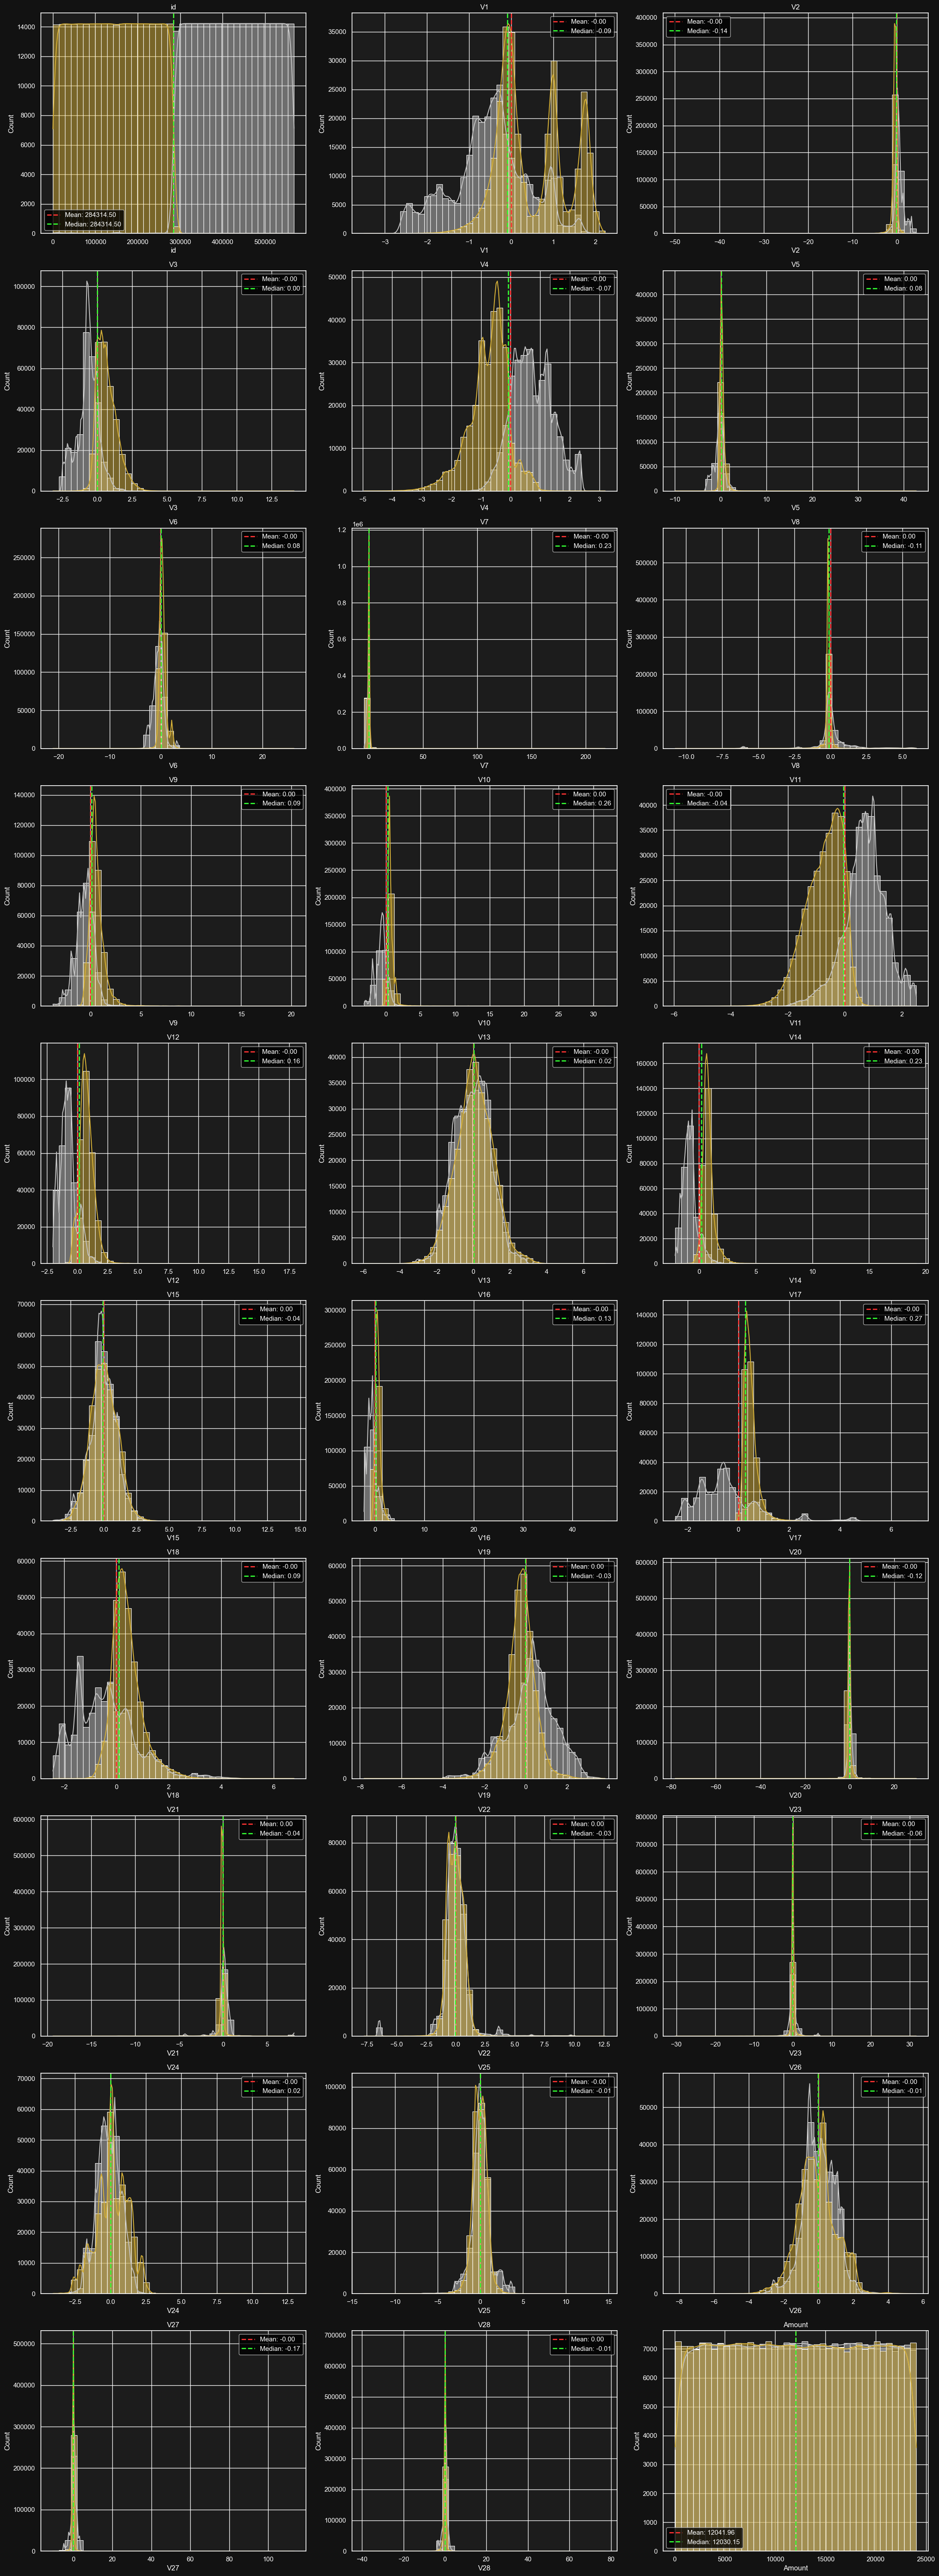

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mpld3

def create_advanced_dashboard(cadru_de_date, columns=None, hue=None, 
                              theme_style='whitegrid', theme_rc=None, 
                              palette=None, figsize=(20, 15), show_kde=True):
    
    if columns is None:
        columns = cadru_de_date.select_dtypes(include=np.number).columns.to_list()
    if hue and hue in columns:
        columns.remove(hue)

    if theme_rc is None:
        theme_rc = {"axes.facecolor": "#1c1c1c", "figure.facecolor": "#121212"}
    if palette is None:
        palette = ["#d4af37", "#c0c0c0", "#4b4b4b"]

    sns.set_theme(style=theme_style, rc=theme_rc)
    
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    plot_index = 0
    for col in columns:
        ax = axes[plot_index]
        hist = sns.histplot(
            data=cadru_de_date, x=col, hue=hue,
            bins=40, palette=palette, edgecolor='white',
            kde=show_kde, ax=ax
        )
        
        # Calcule statistice
        mean_value = cadru_de_date[col].mean()
        median_value = cadru_de_date[col].median()
        ax.axvline(mean_value, color='#ff3333', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        ax.axvline(median_value, color='#33ff33', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        ax.set_title(f'{col}', fontsize=12, color='white')
        ax.set_xlabel(col, color='white')
        ax.set_ylabel('Count', color='white')
        ax.legend(facecolor='black', labelcolor='white')
        ax.tick_params(colors='white')

        # Tooltip avansat
        total = len(cadru_de_date[col].dropna())
        bars = hist.patches
        labels = [f"{col}: {bar.get_x():.2f} - Count: {int(bar.get_height())} ({(bar.get_height()/total*100):.1f}%)" 
                  for bar in bars]
        tooltip = mpld3.plugins.PointLabelTooltip(ax, labels=labels)
        mpld3.plugins.connect(fig, tooltip)

        plot_index += 1
    
    # Elimină axe goale
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    # Interactivitate suplimentară
    mpld3.plugins.connect(fig, mpld3.plugins.Zoom())   # Zoom și pan
    
    plt.tight_layout()
    mpld3.show()


# ======================
# Exemplu de rulare
# ======================
columns = cadru_de_date.columns.to_list()
palette = ["#d4af37", "#c0c0c0", "#4b4b4b"]  # Yeezy Palette

create_advanced_dashboard(
    cadru_de_date=cadru_de_date,
    columns=columns,
    hue='Class',
    theme_style='darkgrid',
    theme_rc={"axes.facecolor": "#1c1c1c", "figure.facecolor": "#121212"},
    palette=palette,
    figsize=(22, 60),
    show_kde=True
)


C:\Users\razva\AppData\Local\Temp\ipykernel_29340\3631005848.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cadru_de_date, x=hue, y=col, palette=palette, ax=ax)
C:\Users\razva\AppData\Local\Temp\ipykernel_29340\3631005848.py:41: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=cadru_de_date, x=hue, y=col, palette=palette, ax=ax)
C:\Users\razva\AppData\Local\Temp\ipykernel_29340\3631005848.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cadru_de_date, x=hue, y=col, palette=palette, ax=ax)
C:\Users\razva\AppData\Local\Temp\ipykernel_29340\3631005848.py:41: UserWarning: The palette list has more values (3) th

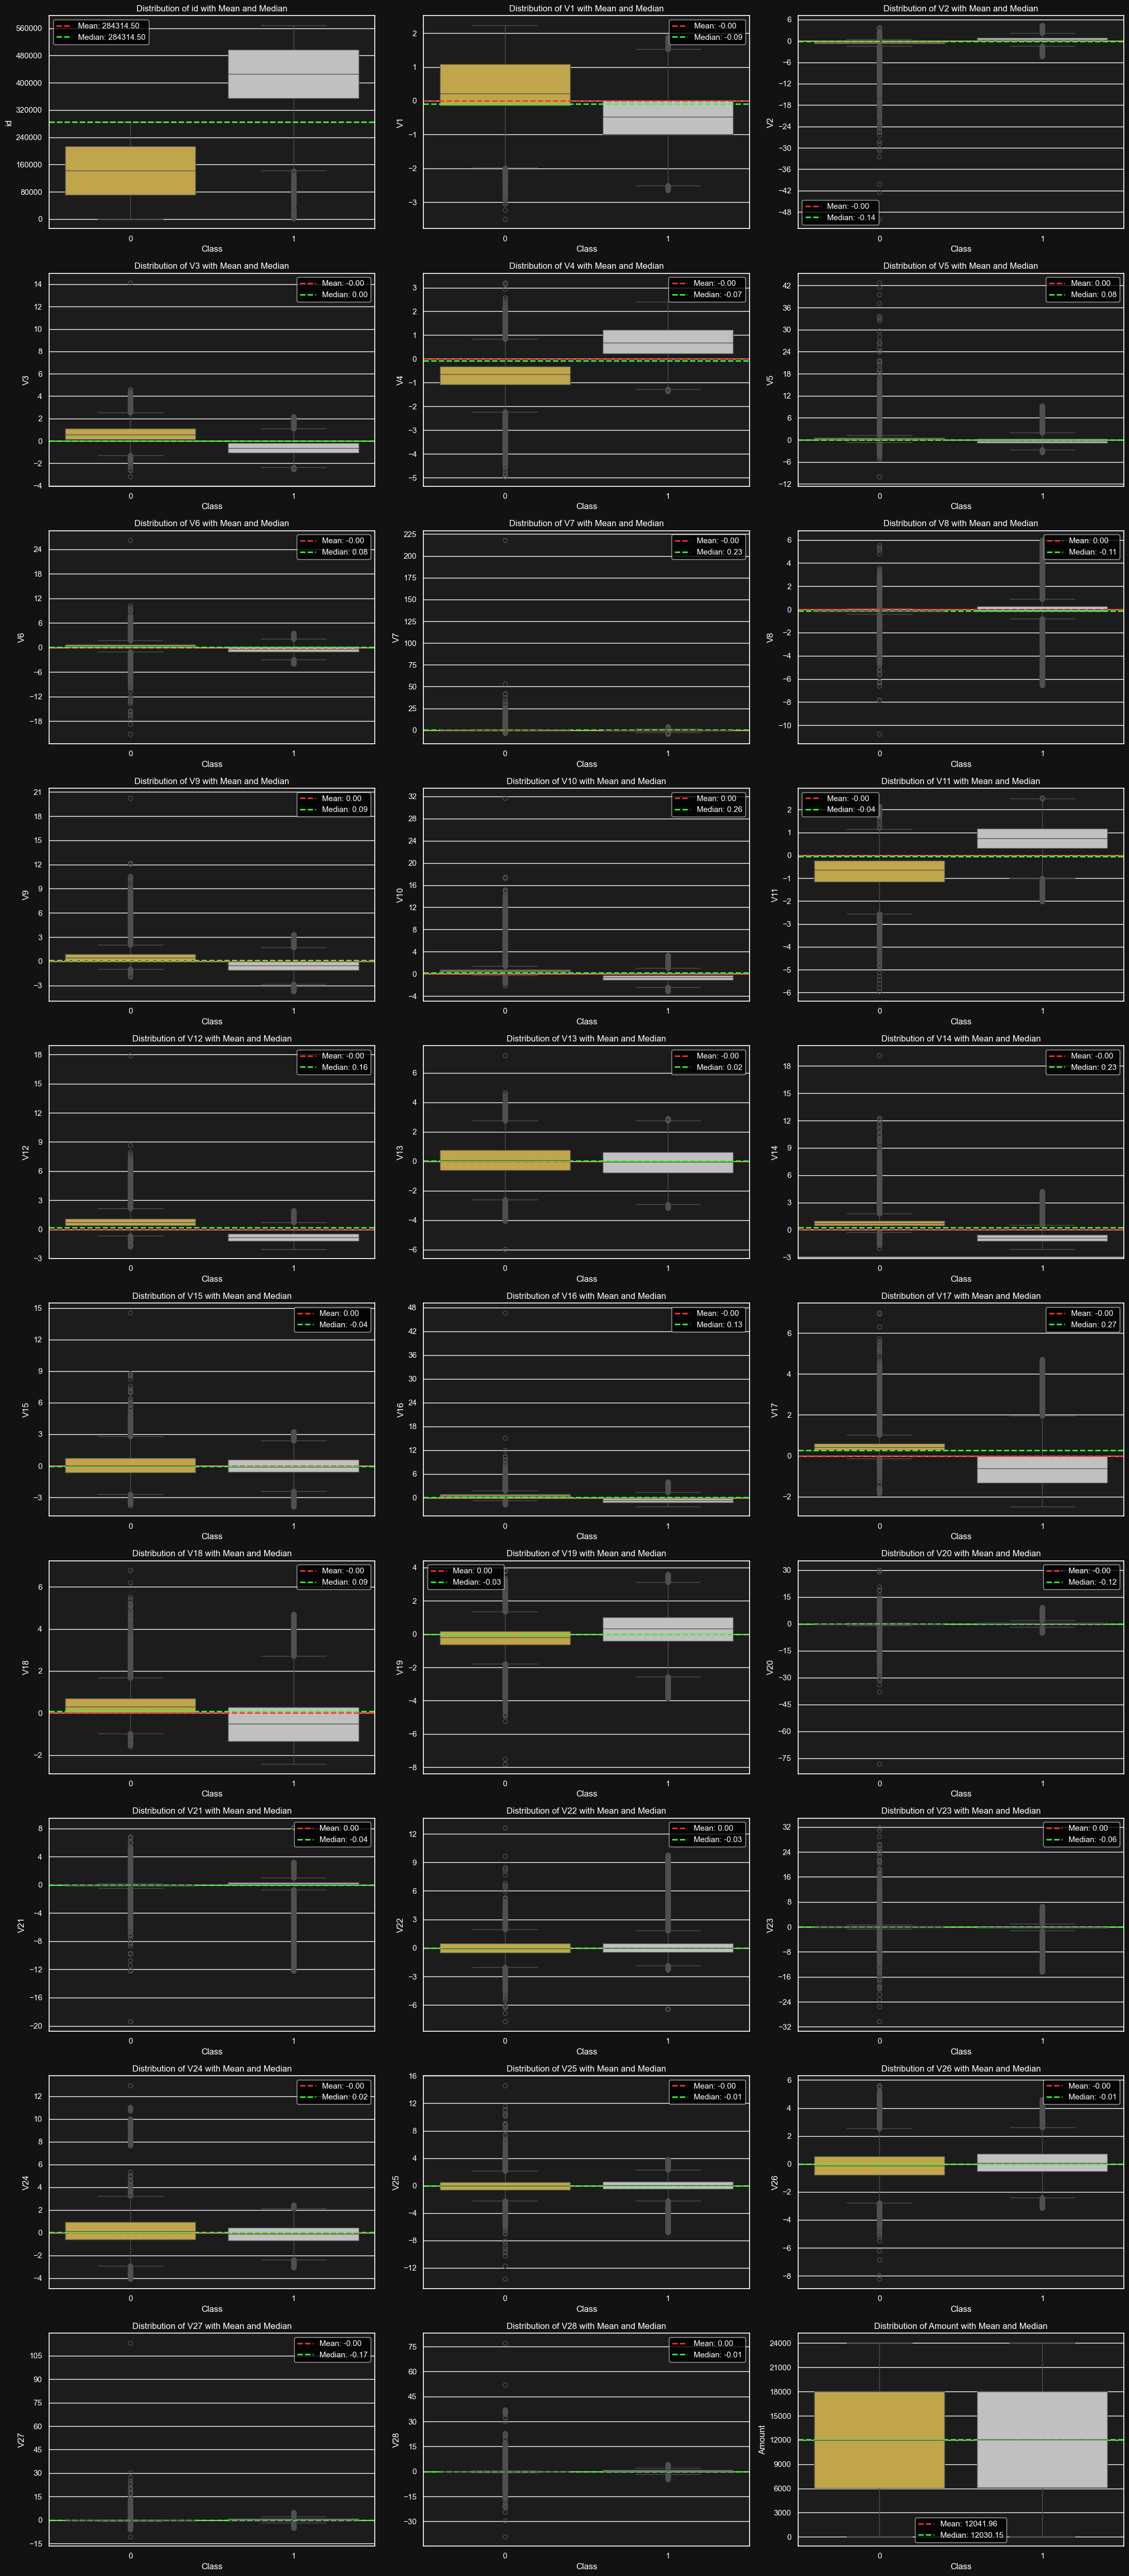

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mpld3

def create_boxplot_dashboard(cadru_de_date, columns=None, hue=None,
                             theme_style='darkgrid', theme_rc=None,
                             palette=None, figsize=None, use_mpld3=False):
    if columns is None:
        columns = cadru_de_date.select_dtypes(include=np.number).columns.to_list()
    if hue and hue in columns:
        columns.remove(hue)

    if hue:
        cadru_de_date[hue] = cadru_de_date[hue].astype(str)

    for col in columns:
        if not np.issubdtype(cadru_de_date[col].dtype, np.number):
            cadru_de_date[col] = pd.to_numeric(cadru_de_date[col], errors='coerce')

    if theme_rc is None:
        theme_rc = {"axes.facecolor": "#1c1c1c", "figure.facecolor": "#121212"}
    if palette is None:
        palette = ["#d4af37", "#c0c0c0", "#4b4b4b"]

    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3

    if figsize is None:
        figsize = (22, num_rows * 5)

    sns.set_theme(style=theme_style, rc=theme_rc)

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()

    plot_index = 0
    for col in columns:
        ax = axes[plot_index]
        sns.boxplot(data=cadru_de_date, x=hue, y=col, palette=palette, ax=ax)

        mean_value = cadru_de_date[col].mean()
        median_value = cadru_de_date[col].median()

        ax.axhline(mean_value, color='#ff3333', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        ax.axhline(median_value, color='#33ff33', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

        ax.set_title(f'Distribution of {col} with Mean and Median', color='white')
        ax.set_xlabel(hue, color='white')
        ax.set_ylabel(col, color='white')
        ax.legend(facecolor='black', labelcolor='white')
        ax.tick_params(colors='white')

        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

        plot_index += 1

    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if use_mpld3:
        try:
            mpld3.plugins.connect(fig, mpld3.plugins.Zoom())
            mpld3.display(fig)
        except Exception as e:
            print(f"mpld3 error: {e}")
            print("Fallback la plt.show()")
            plt.show()
    else:
        plt.show()


# Exemplu de rulare
cale_fisier = 'C:/Users/razva/Downloads/creditcard_2023.csv'
cadru_de_date = pd.read_csv(cale_fisier)

numeric_cols = cadru_de_date.select_dtypes(include=np.number).columns.to_list()

palette = ["#d4af37", "#c0c0c0", "#4b4b4b"]

create_boxplot_dashboard(
    cadru_de_date=cadru_de_date,
    columns=numeric_cols,
    hue='Class',
    theme_style='darkgrid',
    theme_rc={"axes.facecolor": "#1c1c1c", "figure.facecolor": "#121212"},
    palette=palette,
    use_mpld3=False  # <-- aici setează True doar dacă vrei interactivitate mpld3
)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mpld3

class HoverResize(mpld3.plugins.PluginBase):
    """A plugin to resize plots on hover."""
    JAVASCRIPT = """
    mpld3.register_plugin("hoverresize", HoverResize);
    HoverResize.prototype = Object.create(mpld3.Plugin.prototype);
    HoverResize.prototype.constructor = HoverResize;
    function HoverResize(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    HoverResize.prototype.draw = function(){
        var fig = this.fig;
        var ax = fig.axes;
        
        ax.forEach(function(axis) {
            var axes = axis.elements[0];
            axes.on("mouseover", function(d) {
                d3.select(this).select("path")
                    .transition().duration(200)
                    .attr("transform", "scale(1.1)");
            });
            axes.on("mouseout", function(d) {
                d3.select(this).select("path")
                    .transition().duration(200)
                    .attr("transform", "scale(1.0)");
            });
        });
    };
    """
    def __init__(self):
        self.dict_ = {"type": "hoverresize"}

def create_piechart_subplots(cadru_de_date, columns, hue, theme_style, theme_rc, figsize_per_plot=(15, 15), use_mpld3=False):
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    num_plots = len(columns) - 1  # exclude hue column
    plots_per_row = 2
    num_rows = (num_plots + plots_per_row - 1) // plots_per_row
    
    figsize = (figsize_per_plot[0] * plots_per_row, figsize_per_plot[1] * num_rows)
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    
    # Normalize axes array shape
    if num_rows == 1 and plots_per_row == 1:
        axes = [axes]
    elif num_rows == 1:
        axes = axes.flatten()
    elif plots_per_row == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    plot_index = 0
    class_counts = cadru_de_date[hue].value_counts()
    
    for col in columns:
        if col == hue:
            continue
        
        wedges, texts, autotexts = axes[plot_index].pie(
            class_counts,
            labels=class_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=sns.color_palette("magma", len(class_counts))
        )
        axes[plot_index].set_title(f'Distribution of {hue}', color='white', fontsize=20)
        for text in texts + autotexts:
            text.set_fontsize(16)
            text.set_color("white")

        plot_index += 1
    
    # Remove extra axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    
    if use_mpld3:
        mpld3.plugins.connect(fig, HoverResize())
        mpld3.show()
    else:
        plt.show()


# ====== Exemplu de rulare ======
cale_fisier = 'C:/Users/razva/Downloads/creditcard_2023.csv'
cadru_de_date = pd.read_csv(cale_fisier)
columns = cadru_de_date.columns.to_list() 
hue = columns[-1]  # presupunem ultima coloană ca fiind hue

create_piechart_subplots(
    cadru_de_date=cadru_de_date,
    columns=columns,
    hue=hue,
    theme_style='whitegrid',
    theme_rc={"axes.facecolor": "#5fa1bc", "figure.facecolor": "#121212"},
    figsize_per_plot=(15, 15),   # modifică aici dimensiunea fiecărui plot
    use_mpld3=False              # pune True dacă vrei interactivitate mpld3
)


In [19]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from colorama import Fore, Back, Style, init

# Initialize colorama (pentru Windows)
init(autoreset=True)

# Presupunem că 'cadru_de_date' e deja încărcat

# Separarea caracteristicilor și țintei
X = cadru_de_date.drop('Class', axis=1)
y = cadru_de_date['Class']

# Selectare coloane numerice
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline pentru preprocesare numerică
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Definirea pipeline-ului complet cu modelul Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(verbose=False, random_state=42))
])

# Împărțirea în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antrenarea modelului
model.fit(X_train, y_train)

# Predicții pe setul de test
y_pred = model.predict(X_test)

# Calcularea acurateței
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Raport de clasificare cu culori
print("\n" + Back.BLUE + Fore.WHITE + "Classification Report" + Style.RESET_ALL)
report = classification_report(y_test, y_pred, output_dict=True)

for key, value in report.items():
    if key in ['0', '1']:
        color_prec = Fore.GREEN if value['precision'] > 0.8 else Fore.RED
        color_rec = Fore.GREEN if value['recall'] > 0.8 else Fore.RED
        color_f1 = Fore.GREEN if value['f1-score'] > 0.8 else Fore.RED
        
        print(f"Class {key}:")
        print(f"  Precision: {color_prec}{value['precision']:.2f}{Style.RESET_ALL}")
        print(f"  Recall:    {color_rec}{value['recall']:.2f}{Style.RESET_ALL}")
        print(f"  F1-score:  {color_f1}{value['f1-score']:.2f}{Style.RESET_ALL}")
        print(f"  Support:   {value['support']}")
    else:
        # Pentru macro avg, weighted avg etc.
        print(f"{key}: {value}")


Accuracy: 0.9998

Classification Report
Class 0:
  Precision: 1.00
  Recall:    1.00
  F1-score:  1.00
  Support:   56750
Class 1:
  Precision: 1.00
  Recall:    1.00
  F1-score:  1.00
  Support:   56976
accuracy: 0.9998241387193781
macro avg: {'precision': 0.9998240082250969, 'recall': 0.9998242778163338, 'f1-score': 0.9998241380731807, 'support': 113726}
weighted avg: {'precision': 0.9998241486617996, 'recall': 0.9998241387193781, 'f1-score': 0.9998241387430918, 'support': 113726}
